In [21]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [20]:
cd ..

/home/ck/pythonWorkspace


In [22]:
path = cnst.network_data + 'data/OBS/MSG_WA30/track_back_cores_vn1_17Z.txt'
dic = pd.read_table(path, delim_whitespace=True, header=None, names=['year' ,'mon' ,'day', 'i_core' ,'j_core' ,'i_initiation' ,'j_initiation', 'core_time', 'initiation_time'])

In [23]:
dic

,year,mon,day,i_core,j_core,i_initiation,j_initiation,core_time,initiation_time
0,2006,6,1,915,231,931,249,17.0,14.0
1,2006,6,1,756,251,927,324,17.0,5.0
2,2006,6,1,957,272,931,249,17.0,14.0
3,2006,6,1,953,278,931,249,17.0,14.0
4,2006,6,1,451,412,385,399,17.0,13.0
5,2006,6,2,519,233,662,330,17.0,8.0
6,2006,6,2,886,236,928,196,17.0,12.5
7,2006,6,2,884,237,928,196,17.0,12.5
8,2006,6,2,506,243,662,330,17.0,8.0
9,2006,6,2,492,252,662,330,17.0,8.0


In [24]:
init = dic['initiation_time']

KeyError: 'area'

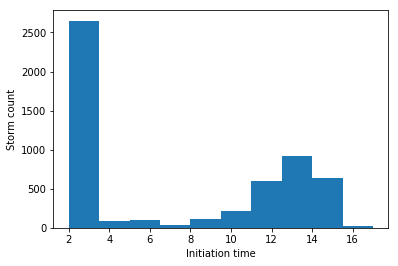

In [26]:
f = plt.figure()
plt.hist(init, range=(2,17))
plt.ylabel('Storm count')
plt.xlabel('Initiation time')
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_number.jpg')

In [27]:
np.sum(init>13)

1052

In [28]:
np.sum(init<=6)

2840

In [29]:
def merge_tab(h):
    outpath = '/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/'
    msgopen = pd.read_csv(outpath + 'cores_gt15000km2_table_AMSRE_'+str(h)+'.csv')
    path = cnst.network_data + 'data/OBS/MSG_WA30/track_back_cores_vn1_'+str(h)+'Z.txt'
    dic = pd.read_table(path, delim_whitespace=True, header=None, names=['year' ,'mon' ,'day', 'i_core' ,'j_core' ,'i_initiation' ,'j_initiation', 'core_time', 'initiation_time'])
    msgopen['initTime'] = np.nan
    msgopen['xinit'] = np.nan
    msgopen['yinit'] = np.nan
    msgopen['xdiff']= np.nan
    for dids, dit in msgopen.iterrows():
        ddic = dic[(dic['i_core']==dit['xloc']) & (dic['j_core']==dit['yloc']) & (dic['year']==dit['year']) & (dic['mon']==dit['month'])  & (dic['day']== dit['day'])]
        msgopen['initTime'] = dic['initiation_time']
        msgopen['xinit'] = dic['i_initiation']
        msgopen['yinit'] = dic['j_initiation']
        msgopen['xdiff'] = dic['i_initiation']-dic['i_core']
    #ipdb.set_trace()
    msgopen.to_csv(outpath + "cores_gt15000km2_table_AMSRE_tracking_" + str(h) + ".csv", na_rep=-999, index_label='id')

In [30]:
#merge_tab(17)

In [31]:
msgopen = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_17.csv')

In [32]:
msgopen['initTime'] = np.nan
msgopen['xinit'] = np.nan
msgopen['yinit'] = np.nan
msgopen['xdiff']= np.nan

In [33]:
for dids, dit in msgopen.iterrows():
    ddic = dic[(dic['i_core']==dit['xloc']) & (dic['j_core']==dit['yloc']) & (dic['year']==dit['year']) & (dic['mon']==dit['month'])  & (dic['day']== dit['day'])]
    msgopen['initTime'] = dic['initiation_time']
    msgopen['xinit'] = dic['i_initiation']
    msgopen['yinit'] = dic['j_initiation']
    msgopen['xdiff'] = dic['i_initiation']-dic['i_core']

In [34]:
msgopen.head()

,id,year,month,day,hour,lon,lat,xloc,yloc,area,csize,t,storm_id,SMmean,SMdry,SMwet,initTime,xinit,yinit,xdiff
0,0,2006,6,1,17,8.505220,10.278089,915,231,22250,28.0,-79.117902,3,-999.000000,-999.0,-999.0,14.0,931,249,16
1,1,2006,6,1,17,4.103475,10.811426,756,251,18350,27.0,-75.433037,2,-999.000000,1.0,0.0,5.0,927,324,171
2,2,2006,6,1,17,9.717946,11.432437,957,272,22250,34.0,-76.449956,3,-999.000000,-999.0,-999.0,14.0,931,249,-26
3,3,2006,6,1,17,9.628114,11.609619,953,278,22250,15.0,-78.000000,3,-999.000000,-999.0,-999.0,14.0,931,249,-22
4,4,2006,6,1,17,-4.385604,15.388820,451,412,15475,16.0,-73.036316,5,-0.357709,0.0,2.0,13.0,385,399,-66


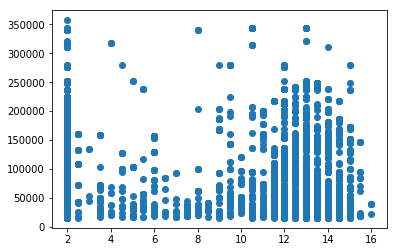

In [35]:
scat = msgopen[(msgopen['initTime'] >= 2) & (msgopen['initTime'] <=17)]
plt.scatter(scat['initTime'], scat['area'])

In [36]:
msgopen['deltaH'] = 17-msgopen['initTime']

In [37]:
msgopen['deltaH'][msgopen['deltaH']<0] = np.nan

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
msgopen['deltaDist'] = (msgopen['xinit'] - msgopen['xloc'])*3

In [39]:
msgopen['deltaDist'][msgopen['deltaDist']<0] = np.nan

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
msgopen['deltaH'].min()

1.0

In [41]:
msgopen['velocity'] = msgopen['deltaDist']/msgopen['deltaH']

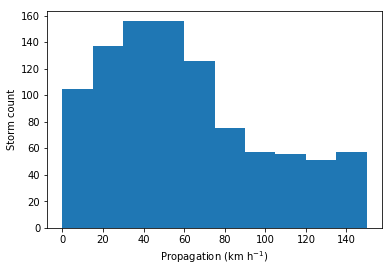

In [42]:
f = plt.figure()
plt.hist(msgopen['velocity'][msgopen['velocity']>0], range=(0,150))
plt.xlabel('Propagation (km h$^{-1}$)')
plt.ylabel('Storm count')
# max around 30-50km per hour. 
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_propagation.jpg')

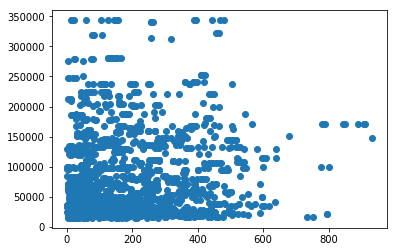

In [43]:
plt.scatter(msgopen['velocity'][msgopen['velocity']>0],msgopen['area'][msgopen['velocity']>0])

In [48]:
np.median((msgopen['area'])[(msgopen['initTime']>=13) & (msgopen['initTime']<17)])

51200.0

In [49]:
np.median((msgopen['area'])[(msgopen['initTime']<=3) & (msgopen['initTime']>0)])

61562.5

(array([370., 223., 117.,  94.,  78.,  78.,  42.,  24.,  46.,  53.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

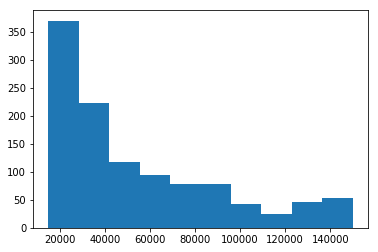

In [55]:
plt.hist((msgopen['area'])[(msgopen['initTime']>=13) & (msgopen['initTime']<17)], range=(15000,150000), bins=10)

(array([545., 328., 316., 213., 131., 136., 131.,  88., 100.,  73.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

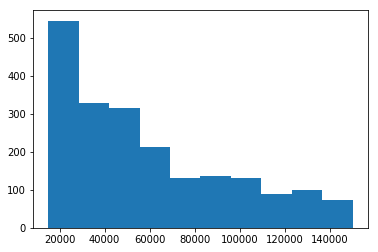

In [56]:
plt.hist((msgopen['area'])[(msgopen['initTime']<=3) & (msgopen['initTime']>0)], range=(15000,150000), bins=10)

In [92]:
initmsg = msgopen[msgopen['initTime']>=13].copy()

In [114]:
for key in ['storm_id', 'year', 'month', 'day']:
    initmsg[key] = initmsg[key].astype(np.str)

In [117]:
np.unique(initmsg['storm_id'] + initmsg['year'] + initmsg['month'] + initmsg['day']).shape

(455,)

In [118]:
propagationmsg = msgopen[msgopen['initTime']<=6].copy()

In [119]:
for key in ['storm_id', 'year', 'month', 'day']:
    propagationmsg[key] = propagationmsg[key].astype(np.str)

In [120]:
np.unique(propagationmsg['storm_id'] + propagationmsg['year'] + propagationmsg['month'] + propagationmsg['day']).shape

(745,)